## IT와 비즈니스 혁신
2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정, 
즉 탐색적 데이터 분석(Exploratory Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 

In [38]:
#나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

In [1]:
%matplotlib inline
import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm   

mpl.rcParams['axes.unicode_minus'] = False  

import pandas as pd
import seaborn as sns

In [2]:
mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [3]:
print(mpl.rcParams['font.family'])

['NanumGothic Eco']


In [4]:
sns.set_style("white") # choose a style for seaborn figure

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", encoding = 'utf-8')
display(health.head()) 
print(health.info())  

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [9]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [27]:
age_counts = health['연령대코드(5세단위)'].value_counts().sort_index()
print(age_counts)

# 현재 데이터에는 40세 이상 연령대만 있음

9     1547
10    1369
11    1798
12    1498
13    1534
14     865
15     698
16     377
17     259
18      55
Name: 연령대코드(5세단위), dtype: int64


### **연령, 성별, 지역을 활용한 시각화**
#### -연령대코드 별 수치
#### -연령대코드별 & 성별
#### -지역별 & 성별

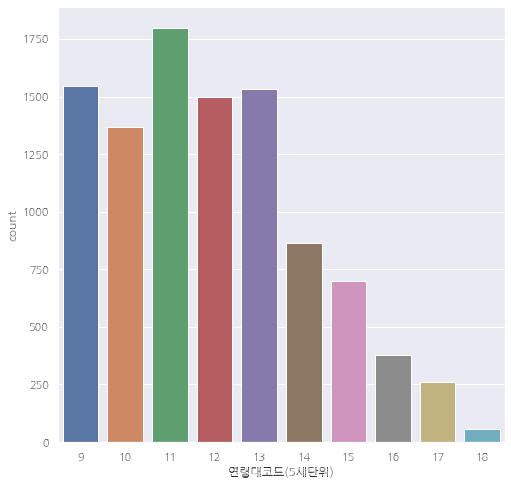

In [100]:
plt.figure(figsize = (8,8))
sns.countplot(data = health, x = '연령대코드(5세단위)')

현재 데이터를 보면 11(50~54세)가 가장 많고, 연령이 높아질수록 수가 적어진다. 현재 데이터에서 주의해야 하는 점은 40세 이상의 케이스만 있다는 점이다.

In [26]:
sex_counts = health['성별코드'].value_counts()  
print(sex_counts)

# Male 데이터가 276케이스 더 많음

M    5138
F    4862
Name: 성별코드, dtype: int64


276

In [14]:
plt.rcParams['font.family'] = "NanumGothic Eco"

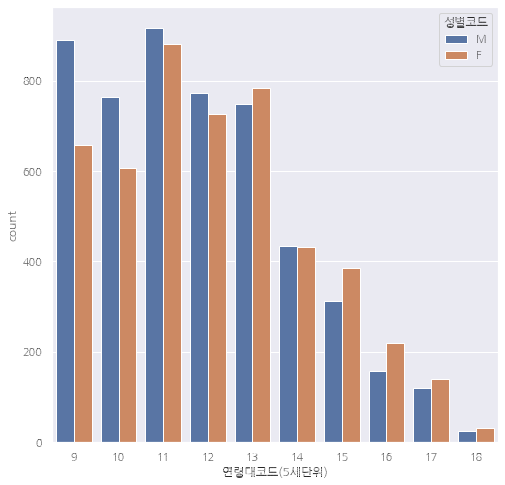

In [101]:
# 연령대별 & 성별
plt.figure(figsize = (8,8))
sns.countplot(data = health, x = "연령대코드(5세단위)", hue = '성별코드')

현재 데이터에서 남성이 여성보다 276케이스 더 많다. 현재 데이터에서 특이한 점은 40~50대와는 달리 60대 이후부터는 여성의 수가 남성의 수보다 많게 나타난다는 것이다.

In [106]:
local_counts = health['시도코드'].value_counts()
print(local_counts)

41    2495
11    1644
26     681
48     663
28     561
47     523
27     495
44     430
46     395
45     392
42     343
30     331
43     323
29     280
31     244
49     123
36      77
Name: 시도코드, dtype: int64


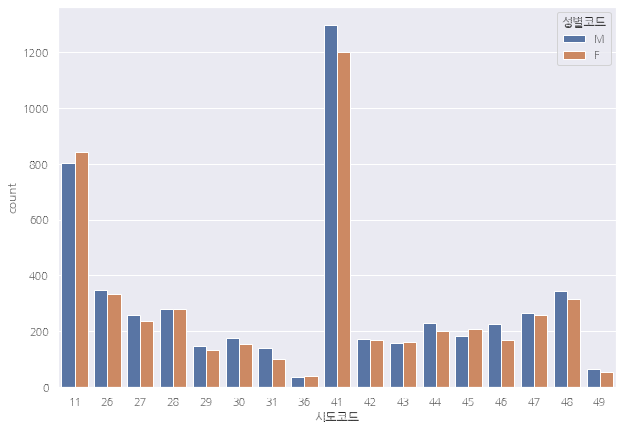

In [105]:
# 지역별 & 성별
plt.figure(figsize = (10,7))
sns.countplot(data = health, x = "시도코드", hue = '성별코드')

현재데이터에서 시도별 인구수는 2021년 지역별 인구 순위와 거의 비슷하게 나타났다. 주목할 점은 서울특별시(11)와 전라북도(45)를 제외한 나머지 지역에서는 남성의 수가 여성보다 많게 나타났다는 점이다. 

###**음주여부와 흡연상태에 따른 비율**
#####-전체
#####-여성의 경우
#####-남성의 경우 

In [30]:
print(health['음주여부'].value_counts().sort_index())
print(health['흡연상태'].value_counts().sort_index())

No     4180
Yes    5819
Name: 음주여부, dtype: int64
No        6231
NotNow    1926
Yes       1841
Name: 흡연상태, dtype: int64


In [23]:
# 결측치 확인
health.loc[health['음주여부'].isna()]

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
9742,2020,9743,11,F,10,155,50,71.5,0.1,1.2,...,0.7,15.0,11.0,13.0,No,NaN,0,NaN,NaN,12/29/2021


In [24]:
health.loc[health['흡연상태'].isna()]

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6823,2020,6824,41,M,11,170,65,85.0,1.2,0.3,...,0.9,19.0,20.0,11.0,NaN,Yes,0,NaN,NaN,12/29/2021
7096,2020,7097,11,F,14,150,55,85.0,0.1,0.8,...,0.6,23.0,16.0,30.0,NaN,Yes,0,NaN,NaN,12/29/2021


In [25]:
# 음주여부와 흡연상태 둘 중 하나라도 결측치 있는 행 제거하여 새로운 데이터 프레임 만들기
df1 = health.dropna(subset = ['흡연상태', '음주여부'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9997 non-null   int64  
 1   가입자일련번호      9997 non-null   int64  
 2   시도코드         9997 non-null   int64  
 3   성별코드         9997 non-null   object 
 4   연령대코드(5세단위)  9997 non-null   int64  
 5   신장(5Cm단위)    9997 non-null   int64  
 6   체중(5Kg 단위)   9997 non-null   int64  
 7   허리둘레         9997 non-null   float64
 8   시력(좌)        9997 non-null   float64
 9   시력(우)        9997 non-null   float64
 10  청력(좌)        9997 non-null   int64  
 11  청력(우)        9997 non-null   int64  
 12  수축기혈압        9909 non-null   float64
 13  이완기혈압        9909 non-null   float64
 14  식전혈당(공복혈당)   9909 non-null   float64
 15  총콜레스테롤       4043 non-null   float64
 16  트리글리세라이드     4043 non-null   float64
 17  HDL콜레스테롤     4043 non-null   float64
 18  LDL콜레스테롤     3976 non-null   float64
 19  혈색소   

In [35]:
# df1에 새로운 파생변수(음주여부&흡연상태) 만들기
df1['음주흡연'] = df1['음주여부'] + "/" +df1["흡연상태"]
display(df1.tail())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,음주흡연
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021,Yes/No
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021,Yes/No
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021,No/No
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021,No/No
9999,2020,10000,45,F,13,160,75,100.0,0.5,0.5,...,32.0,24.0,30.0,NotNow,Yes,0,NaN,NaN,12/29/2021,Yes/NotNow


In [36]:
음주흡연_counts = df1['음주흡연'].value_counts()  
print(음주흡연_counts)

No/No         3388
Yes/No        2842
Yes/NotNow    1501
Yes/Yes       1474
No/NotNow      425
No/Yes         367
Name: 음주흡연, dtype: int64


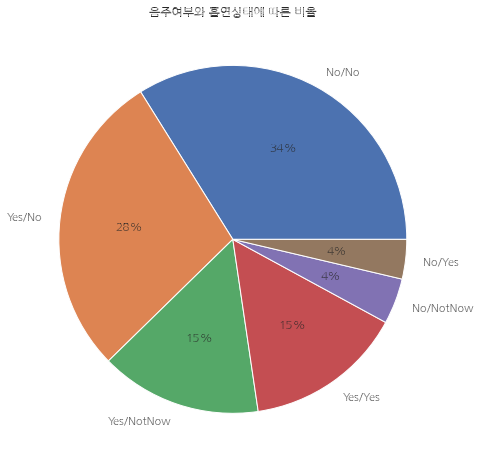

In [50]:
#전체
labels = df1['음주흡연'].value_counts().index.tolist()
ratio = df1['음주흡연'].value_counts().values.tolist() 

plt.figure(figsize = (8,8))
plt.pie(ratio, labels=labels, autopct='%.0f%%')
plt.title('음주여부와 흡연상태에 따른 비율')
plt.show()

음주와 흡연을 둘 다 하지 않는 사람의 비율이 높고 그 다음으로 음주는 하지만 흡연을 하지 않는 사람의 비율이 높다. 새로운 점은 음주는 하지만 흡연을 그만둔 사람과 음주와 흡연을 둘 다 하는 사람의 비율이 같다는 점이다. 기회가 된다면 흡연과 음주를 둘 다 하다가 금연하게 된 사람들을 조사해 원인을 찾으면 좋을 것 같다.

전체적으로 음주를 하는 사람이 흡연을 하는 사람보다 많다.

No/No         2751
Yes/No        1874
Yes/Yes         86
Yes/NotNow      75
No/Yes          42
No/NotNow       32
Name: 음주흡연, dtype: int64


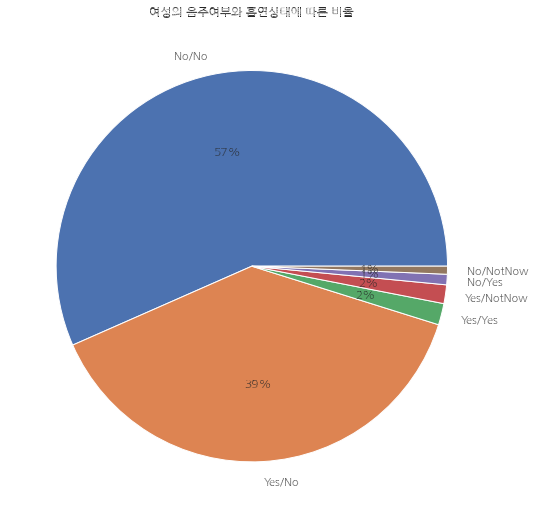

In [55]:
# 여성의 경우
df1_Female = df1.loc[df1['성별코드'] == "F"]

음주흡연_counts1 = df1_Female['음주흡연'].value_counts()  
print(음주흡연_counts1)

labels1 = df1_Female['음주흡연'].value_counts().index.tolist()
ratio1 = df1_Female['음주흡연'].value_counts().values.tolist() 

plt.figure(figsize = (9,9))
plt.pie(ratio1, labels = labels1, autopct = '%.0f%%')
plt.title('여성의 음주여부와 흡연상태에 따른 비율')
plt.show()

여성의 그래프가 조금 극단적으로 음주와 흡연을 둘다 하지 않는 사람과 음주만 하는 사람의 수가 많아서 남성과 여성을 모두 고려한 파이 차트에 큰 영향을 미친것으로 보인다. 

Yes/NotNow    1426
Yes/Yes       1388
Yes/No         968
No/No          637
No/NotNow      393
No/Yes         325
Name: 음주흡연, dtype: int64


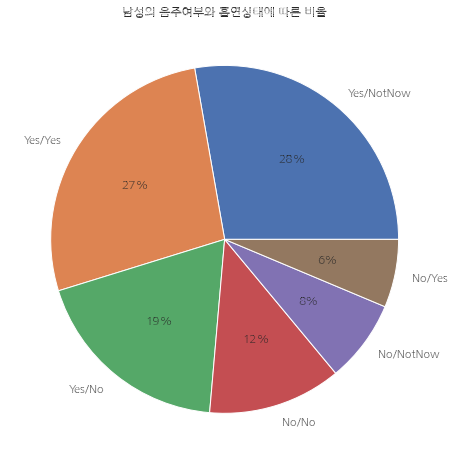

In [53]:
# 남성의 경우
df1_Male = df1.loc[df1['성별코드'] == "M"]

음주흡연_counts2 = df1_Male['음주흡연'].value_counts()  
print(음주흡연_counts2)

labels2 = df1_Male['음주흡연'].value_counts().index.tolist()
ratio2 = df1_Male['음주흡연'].value_counts().values.tolist() 

plt.figure(figsize = (8,8))
plt.pie(ratio2, labels = labels2, autopct = '%.0f%%')
plt.title('남성의 음주여부와 흡연상태에 따른 비율')
plt.show()

예상대로 음주를 하는 사람이 안하는 사람보다 훨씬 많게 나왔으면 남성 데이터에서는 음주와 흡연 둘다 하는 사람의 비율이 높게 나온것으로 보인다.

###**1. 평균 시력(양쪽 시력 평균)**
####-지역별
####-나이별

In [68]:
health[(health["시력(좌)"] >= 9.9) |(health["시력(우)"] >= 9.9)]

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
200,2020,201,41,M,17,175,65,85.0,1.2,9.9,...,0.8,27.0,21.0,23.0,No,No,0,NaN,NaN,12/29/2021
208,2020,209,45,F,13,150,55,84.0,9.9,0.6,...,0.7,34.0,32.0,31.0,No,No,0,NaN,NaN,12/29/2021
522,2020,523,41,M,17,165,70,88.0,9.9,0.5,...,1.4,21.0,6.0,43.0,NotNow,Yes,0,NaN,NaN,12/29/2021
819,2020,820,41,M,12,170,85,102.0,0.7,9.9,...,1.0,46.0,70.0,33.0,No,No,0,NaN,NaN,12/29/2021
864,2020,865,46,M,14,165,75,99.0,9.9,0.9,...,1.1,49.0,36.0,97.0,No,Yes,1,0.0,0.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,2020,9081,44,M,15,165,60,74.0,0.6,9.9,...,1.0,24.0,15.0,12.0,No,Yes,1,0.0,1.0,12/29/2021
9555,2020,9556,41,F,13,155,55,81.0,9.9,0.9,...,0.8,18.0,19.0,10.0,No,Yes,0,NaN,NaN,12/29/2021
9619,2020,9620,43,F,13,150,55,80.0,0.8,9.9,...,0.9,27.0,16.0,18.0,No,Yes,0,NaN,NaN,12/29/2021
9677,2020,9678,31,F,9,175,75,84.0,9.9,0.7,...,1.5,25.0,16.0,21.0,Yes,No,0,NaN,NaN,12/29/2021


In [92]:
# 한쪽 눈이라도 실명인 사람 데이터에서 제거
df2 = health[(health["시력(좌)"] <= 2.5) & (health["시력(우)"] <= 2.5)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9924 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         9924 non-null   int64  
 1   가입자일련번호      9924 non-null   int64  
 2   시도코드         9924 non-null   int64  
 3   성별코드         9924 non-null   object 
 4   연령대코드(5세단위)  9924 non-null   int64  
 5   신장(5Cm단위)    9924 non-null   int64  
 6   체중(5Kg 단위)   9924 non-null   int64  
 7   허리둘레         9924 non-null   float64
 8   시력(좌)        9924 non-null   float64
 9   시력(우)        9924 non-null   float64
 10  청력(좌)        9924 non-null   int64  
 11  청력(우)        9924 non-null   int64  
 12  수축기혈압        9839 non-null   float64
 13  이완기혈압        9839 non-null   float64
 14  식전혈당(공복혈당)   9839 non-null   float64
 15  총콜레스테롤       4007 non-null   float64
 16  트리글리세라이드     4007 non-null   float64
 17  HDL콜레스테롤     4007 non-null   float64
 18  LDL콜레스테롤     3941 non-null   float64
 19  혈색소   

In [93]:
# 양쪽 시력의 평균을 구한 파생변수 만들기
df2['시력평균'] = (df2["시력(좌)"] + df2["시력(우)"]) / 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
# 지역별 시력 평균표
시도코드_시력 = df2.groupby('시도코드').agg(mean_eye = ('시력평균', 'mean'))
시도코드_시력

,mean_eye
시도코드,
11,0.878558
26,0.914328
27,0.889676
28,0.901699
29,0.945504
30,0.876364
31,0.892500
36,1.005844
41,0.911416


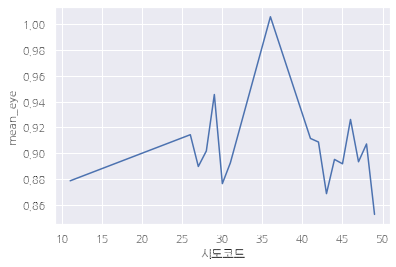

In [95]:
# 지역별 시력 평균 선 그래프
sns.lineplot(data = 시도코드_시력, x = "시도코드", y = "mean_eye")

세종특별시에서 수치가 가장 높게 나왔다

             mean_eye1
연령대코드(5세단위)           
9             1.055296
10            0.999086
11            0.965810
12            0.924530
13            0.838666


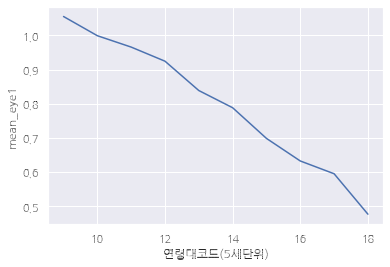

In [97]:
# 연령별 시력 평균표
시도코드_시력 = df2.groupby('연령대코드(5세단위)').agg(mean_eye1 = ('시력평균', 'mean'))
print(시도코드_시력.head())

# 연령별 시력 평균 선 그래프

sns.lineplot(data = 시도코드_시력, x = "연령대코드(5세단위)", y = "mean_eye1")

연령이 높아질수록 시력이 낮아지는 것을 확인할 수 있다.